# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
#warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
#data = data.dropna()
#data = data.drop(columns=['CHAS', 'RAD', 'B'])



In [3]:
data.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
# split the dataset into 89% 20%

X = data.drop(columns="MEDV")
y = data["MEDV"]

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
# train the modele

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3. Calculate and print R-squared for both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R2: {train_r2:.3f}")
print(f"Test R2: {test_r2:.3f}")

Train R2: 0.751
Test R2: 0.669


## 4. Calculate and print mean squared error for both the training and the testing set.

In [7]:
#4.Calculate and print mean squared error 
# for both the training 
# and the testing set.
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
train_mse = mean_squared_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")

#calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Train MAPE: {train_mape:.3f}")
print(f"Test MAPE: {test_mape:.3f}")


Train MSE: 21.641
Test MSE: 24.291
Train MAPE: 0.166
Test MAPE: 0.169


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [8]:
#Calculate and print the mean absolute error
from sklearn.metrics import mean_absolute_error
# Calculate mean absolute error
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Train MAE: {train_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")

Train MAE: 3.315
Test MAE: 3.189


## Classification Model Evaluation

In [9]:
from sklearn.datasets import load_iris
data = load_iris()

In [10]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
column_names = data.feature_names

In [12]:
df = pd.DataFrame(data['data'],columns=column_names)

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
target = pd.DataFrame(data.target)

In [15]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [17]:
# Your code here :
## 6. Split this data set into training (80%) and testing (20%) sets.
from sklearn.model_selection import train_test_split
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The `class` field represents the type of flower and is the target variable that we will want to predict.


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [21]:
# Your code here :
## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.
from sklearn.linear_model import LogisticRegression
# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train.values.ravel())
# Generate predictions


LogisticRegression(max_iter=200)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [22]:
#Calculate and print the accuracy score for both the training and the testing set.
from sklearn.metrics import accuracy_score
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


Train Accuracy: 0.975
Test Accuracy: 1.000


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [23]:
#Calculate and print the balanced accuracy score for both the training and the testing set.
from sklearn.metrics import balanced_accuracy_score
# Calculate balanced accuracy
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print(f"Train Balanced Accuracy: {train_balanced_accuracy:.3f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy:.3f}")

Train Balanced Accuracy: 0.976
Test Balanced Accuracy: 1.000


# Calculate and print the precision score for both the training and the testing set.


In [24]:
# Calculate and print the precision score for both the training and the testing set.
from sklearn.metrics import precision_score
# Calculate precision
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print(f"Train Precision: {train_precision:.3f}")
print(f"Test Precision: {test_precision:.3f}")

Train Precision: 0.977
Test Precision: 1.000


## 11. Calculate and print the recall score for both the training and the testing set.

In [25]:
# Calculate and print the recall score for both the training and the testing set.
from sklearn.metrics import recall_score
# Calculate recall
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Train Recall: {train_recall:.3f}")
print(f"Test Recall: {test_recall:.3f}")

Train Recall: 0.975
Test Recall: 1.000


## 12. Calculate and print the F1 score for both the training and the testing set.

In [26]:
#Calculate and print the F1 score for both the training and the testing set.
from sklearn.metrics import f1_score
# Calculate F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Train F1 Score: {train_f1:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")

Train F1 Score: 0.975
Test F1 Score: 1.000


## 13. Generate confusion matrices for both the training and the testing set.

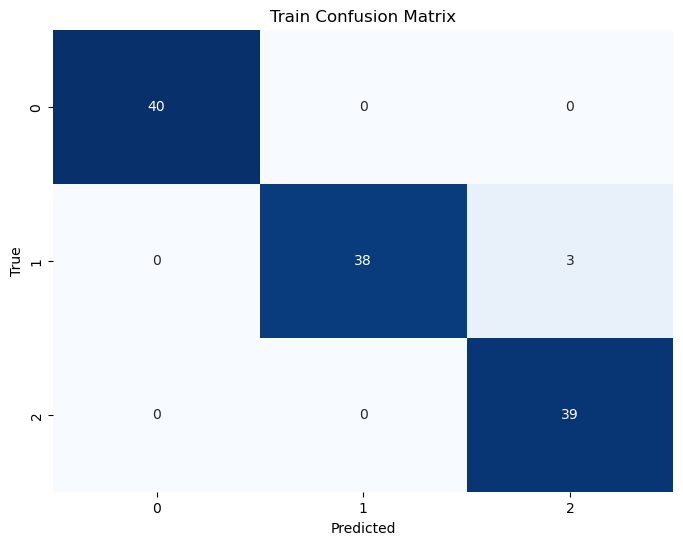

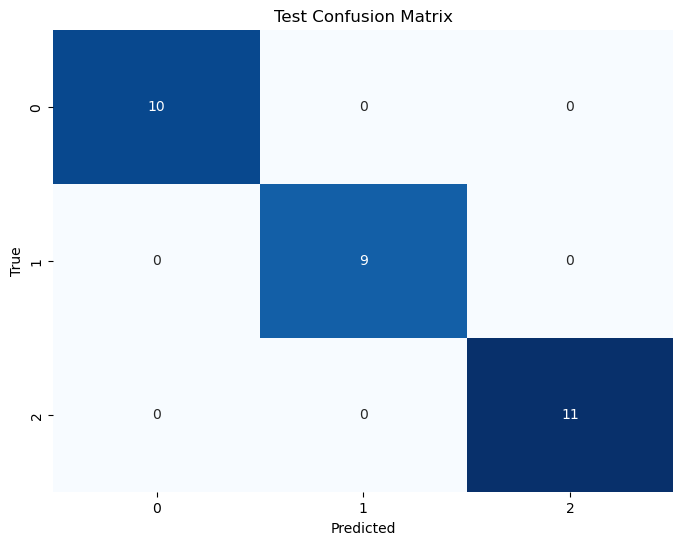

In [28]:
#Generate confusion matrices for both the training and the testing set.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Calculate confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
# Plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(train_cm, 'Train Confusion Matrix')
plot_confusion_matrix(test_cm, 'Test Confusion Matrix')

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [29]:
#For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())
# Generate predictions
rf_y_train_pred = rf_model.predict(X_train)
rf_y_test_pred = rf_model.predict(X_test)
# Calculate accuracy
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)
print(f"Random Forest Train Accuracy: {rf_train_accuracy:.3f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.3f}")

Random Forest Train Accuracy: 1.000
Random Forest Test Accuracy: 1.000
